In [34]:
import pandas as pd

In [60]:
file_path = r'D:\桌面文件\Bristol\mini-project\vdjdb-2023-06-01\Vdjdb.xlsx'
df = pd.read_excel(file_path)
df = df.head(3000)
print(df)

      complex.id gene                  cdr3       v.segm      j.segm  \
0              1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1              1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2              0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3              2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4              2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   
...          ...  ...                   ...          ...         ...   
2995           0  TRB     CASSQGGVLAGGDEQYF   TRBV4-2*01  TRBJ2-7*01   
2996           0  TRB      CASSIDGGGPGNEQFF    TRBV19*01  TRBJ2-1*01   
2997           0  TRB      CASSLTPTGSTDTQYF  TRBV12-3*01  TRBJ2-3*01   
2998           0  TRB      CASSRETGSGANVLTF   TRBV6-4*01  TRBJ2-6*01   
2999           0  TRB      CASSQLDSSLQETQYF    TRBV14*01  TRBJ2-5*01   

          species     mhc.a mhc.b mhc.class antigen.epitope  ...  \
0     HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...   

In [61]:
df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene'}, inplace=True)

df.dropna(subset=['cdr3_b_aa', 'v_b_gene'], inplace=True)


In [62]:
from tcrdist.repertoire import TCRrep


tr = TCRrep(cell_df=df, organism='human', chains=['beta'])


tr.compute_distances()


D:\AJumpy\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\AJumpy\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
D:\AJumpy\lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV14D-2*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
D:\AJumpy\lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRBV13-2*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
D:\AJumpy\lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV9-4*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
D:\AJumpy\lib\site-pa

<ipython-input-65-a56049b2c1cd>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(tr.pw_beta, method='ward')


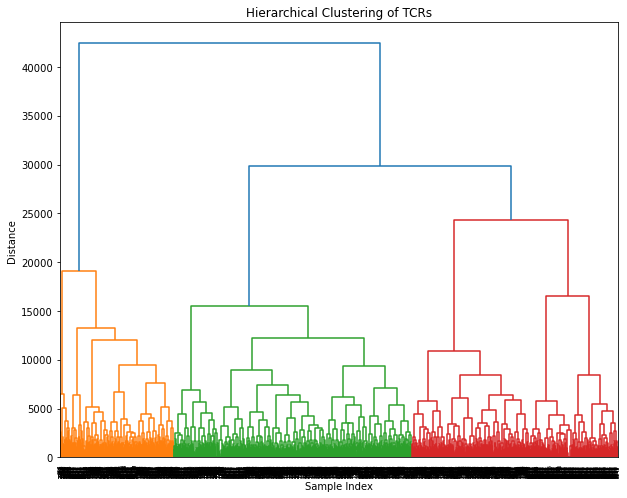

In [65]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 进行层次聚类
Z = linkage(tr.pw_beta, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering of TCRs')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [66]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters based on the dendrogram
n_clusters = 5
clusters = fcluster(Z, n_clusters, criterion='maxclust')

#Contour coefficient  -1 1
silhouette_avg = silhouette_score(tr.pw_beta, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz Index  bigger better 0-oo
calinski_harabasz_avg = calinski_harabasz_score(tr.pw_beta, clusters)
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Davies-Bouldin Index smaller better  0-oo
davies_bouldin_avg = davies_bouldin_score(tr.pw_beta, clusters)
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


Silhouette Score: 0.14399829574489828
Calinski-Harabasz Index: 456.36430773161544
Davies-Bouldin Index: 1.8088502462518825
